In [5]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2.0.0


In [2]:
# Hyperparameters
vocab_size = 10000
embedding_dim =16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [3]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /tmp/sarcasm.json

--2019-10-05 14:18:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com... 172.217.160.144
Connecting to storage.googleapis.com|172.217.160.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  1.11MB/s    in 4.8s    

2019-10-05 14:18:33 (1.11 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [6]:
with open('/tmp/sarcasm.json', 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [16]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [17]:
# create word vector
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
# create padded matrix of the sentences - sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)


In [18]:
# build a model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile and summary the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [29]:
# fit the model
num_epochs = 30
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
# predict from the model
# calculate the accuracy

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 1s 69us/sample - loss: 0.0276 - accuracy: 0.9927 - val_loss: 0.9184 - val_accuracy: 0.8155
Epoch 2/30
20000/20000 [==============================] - 1s 70us/sample - loss: 0.0247 - accuracy: 0.9941 - val_loss: 0.9726 - val_accuracy: 0.8147
Epoch 3/30
20000/20000 [==============================] - 1s 69us/sample - loss: 0.0224 - accuracy: 0.9944 - val_loss: 1.0453 - val_accuracy: 0.8135
Epoch 4/30
20000/20000 [==============================] - 1s 68us/sample - loss: 0.0203 - accuracy: 0.9945 - val_loss: 1.1217 - val_accuracy: 0.8109
Epoch 5/30
20000/20000 [==============================] - 1s 68us/sample - loss: 0.0191 - accuracy: 0.9948 - val_loss: 1.1318 - val_accuracy: 0.8106
Epoch 6/30
20000/20000 [==============================] - 1s 68us/sample - loss: 0.0166 - accuracy: 0.9956 - val_loss: 1.1827 - val_accuracy: 0.8098
Epoch 7/30
20000/20000 [==============================] -

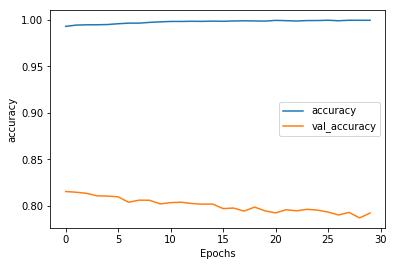

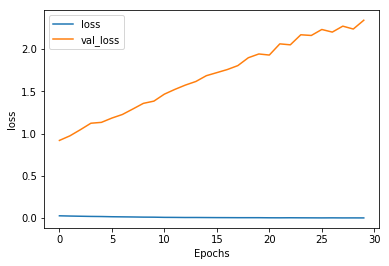

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 20000,
 'steps': 625,
 'verbose': 0}